In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

df1 = pd.read_csv ('C:/Users/joelk/IRONHACK_CLASS/World-energy-production-and-consumption-analysis/Data/Energy data 1990 - 2020.csv')
#df2 = pd.read_csv ('Data/World_Energy_By_Country_And_Region_1965_to_2023.csv')

In [2]:
df1

,country,Year,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),...,Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
0,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,...,25.395000,45.68403547,14.301991,0.095856,17.242000,13.693000,0.94,0,57.850000,0
1,Algeria,1991,Arab States,57.149971,2.435026,0.249895,102.586171,23.469959,1.580793,7.994748,...,25.435000,49.53198889,15.312995,0.102625,18.535000,14.058000,1.171,0,57.076000,0
2,Algeria,1992,Arab States,57.262430,2.383517,0.245959,104.205908,24.024343,1.022926,8.490068,...,25.459000,51.67001137,15.727010,0.103192,19.454000,15.130000,1.056,0,56.904000,0
3,Algeria,1993,Arab States,59.198702,2.455335,0.259730,104.928745,24.110238,1.709195,8.291029,...,25.463000,52.38599054,16.596984,0.105782,20.653000,15.144000,1.015,0,56.995000,0
4,Algeria,1994,Arab States,56.347927,2.424649,0.249468,100.612596,23.239627,0.783869,9.170605,...,23.971000,48.20601995,16.117004,0.102888,21.177000,15.545000,0.943,0,56.312000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,Venezuela,2016,South/Latin America,130.244135,2.214743,0.304632,169.124743,58.807791,58.377863,19.308332,...,42.060000,24.47599903,22.692979,0.137547,107.981000,73.420000,0.202,0.07223493,131.988000,0.9
1360,Venezuela,2017,South/Latin America,124.106123,2.222989,0.344218,148.976952,55.828488,58.379586,19.658549,...,36.647685,24.00755269,22.803576,0.154845,103.777449,70.153699,0.112222,0.075160838,113.220110,0.5
1361,Venezuela,2018,South/Latin America,113.249553,2.701646,0.390782,115.312748,41.918720,58.380532,20.319222,...,31.411686,23.70998143,23.828481,0.144646,99.738223,66.530345,0.044889,0.077432701,84.860873,0.2
1362,Venezuela,2019,South/Latin America,101.200206,2.793624,0.537237,81.895069,36.225425,58.377040,21.292363,...,29.023761,19.59998465,21.197943,0.192308,96.463748,64.427278,0.029469014,0.073940761,56.900109,0.29820421


In [3]:
df1.isna().sum()

country                                                                     0
Year                                                                        0
Region                                                                      0
CO2 emissions from fuel combustion (MtCO2)                                  0
Average CO2 emission factor (tCO2/toe)                                      0
CO2 intensity at constant purchasing power parities (kCO2/$15p)             0
Total energy production (Mtoe)                                              0
Total energy consumption (Mtoe)                                             0
Share of renewables in electricity production (%)                           0
Share of electricity in total final energy consumption (%)                  0
Oil products domestic consumption (Mt)                                      0
Refined oil products production (Mt)                                        0
Natural gas production (bcm)                                    

In [4]:
df1.columns

Index(['country', 'Year', 'Region',
       'CO2 emissions from fuel combustion (MtCO2)',
       'Average CO2 emission factor (tCO2/toe)',
       'CO2 intensity at constant purchasing power parities (kCO2/$15p)',
       'Total energy production (Mtoe)', 'Total energy consumption (Mtoe)',
       'Share of renewables in electricity production (%)',
       'Share of electricity in total final energy consumption (%)',
       'Oil products domestic consumption (Mt)',
       'Refined oil products production (Mt)', 'Natural gas production (bcm)',
       'Natural gas domestic consumption (bcm)',
       'Energy intensity of GDP at constant purchasing power parities (koe/$15p)',
       'Electricity production (TWh)',
       'Electricity domestic consumption (TWh)',
       'Coal and lignite domestic consumption (Mt)',
       'Share of wind and solar in electricity production (%)',
       'Crude oil production (Mt)', 'Coal and lignite production (Mt)'],
      dtype='object')

In [5]:
df1.dtypes

country                                                                      object
Year                                                                          int64
Region                                                                       object
CO2 emissions from fuel combustion (MtCO2)                                  float64
Average CO2 emission factor (tCO2/toe)                                      float64
CO2 intensity at constant purchasing power parities (kCO2/$15p)             float64
Total energy production (Mtoe)                                              float64
Total energy consumption (Mtoe)                                             float64
Share of renewables in electricity production (%)                           float64
Share of electricity in total final energy consumption (%)                  float64
Oil products domestic consumption (Mt)                                      float64
Refined oil products production (Mt)                                        

In [6]:
duplicates = df1.duplicated(subset=['country', 'Year'])
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [7]:
# List the columns you want to convert from object to float
columns_to_convert = [
    'Natural gas production (bcm)', 
    'Coal and lignite domestic consumption (Mt)', 
    'Share of wind and solar in electricity production (%)', 
    'Coal and lignite production (Mt)','CO2 emissions from fuel combustion (MtCO2)'
]

# Convert these columns to numeric (float) and handle errors (e.g., non-numeric values)
for col in columns_to_convert:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Check if the conversion was successful
print(df1.dtypes)


country                                                                      object
Year                                                                          int64
Region                                                                       object
CO2 emissions from fuel combustion (MtCO2)                                  float64
Average CO2 emission factor (tCO2/toe)                                      float64
CO2 intensity at constant purchasing power parities (kCO2/$15p)             float64
Total energy production (Mtoe)                                              float64
Total energy consumption (Mtoe)                                             float64
Share of renewables in electricity production (%)                           float64
Share of electricity in total final energy consumption (%)                  float64
Oil products domestic consumption (Mt)                                      float64
Refined oil products production (Mt)                                        

In [9]:
# Renaming all columns to make them easier to work with
df1.rename(columns={
    'country': 'Country',
    'Year': 'Year',
    'Region': 'Region',
    'CO2 emissions from fuel combustion (MtCO2)': 'CO2_Emissions_MtCO2',
    'Average CO2 emission factor (tCO2/toe)': 'Average_CO2_Emission_Factor',
    'CO2 intensity at constant purchasing power parities (kCO2/$15p)': 'CO2_Intensity_PPP',
    'Total energy production (Mtoe)': 'Total_Energy_Production_Mtoe',
    'Total energy consumption (Mtoe)': 'Total_Energy_Consumption_Mtoe',
    'Share of renewables in electricity production (%)': 'Renewable_Energy_Share_Percent',
    'Share of electricity in total final energy consumption (%)': 'Electricity_Share_Final_Consumption',
    'Oil products domestic consumption (Mt)': 'Oil_Products_Consumption_Mt',
    'Refined oil products production (Mt)': 'Refined_Oil_Products_Production_Mt',
    'Natural gas production (bcm)': 'Natural_Gas_Production_bcm',
    'Natural gas domestic consumption (bcm)': 'Natural_Gas_Consumption_bcm',
    'Energy intensity of GDP at constant purchasing power parities (koe/$15p)': 'Energy_Intensity_GDP_PPP',
    'Electricity production (TWh)': 'Electricity_Production_TWh',
    'Electricity domestic consumption (TWh)': 'Electricity_Consumption_TWh',
    'Coal and lignite domestic consumption (Mt)': 'Coal_Lignite_Consumption_Mt',
    'Share of wind and solar in electricity production (%)': 'Wind_Solar_Share_Percent',
    'Crude oil production (Mt)': 'Crude_Oil_Production_Mt',
    'Coal and lignite production (Mt)': 'Coal_Lignite_Production_Mt'
}, inplace=True)

# Verify the renaming
print(df1.columns)

# Save the cleaned dataset (optional)
df1.to_csv('cleaned_energy_data.csv', index=False)


Index(['Country', 'Year', 'Region', 'CO2_Emissions_MtCO2',
       'Average_CO2_Emission_Factor', 'CO2_Intensity_PPP',
       'Total_Energy_Production_Mtoe', 'Total_Energy_Consumption_Mtoe',
       'Renewable_Energy_Share_Percent', 'Electricity_Share_Final_Consumption',
       'Oil_Products_Consumption_Mt', 'Refined_Oil_Products_Production_Mt',
       'Natural_Gas_Production_bcm', 'Natural_Gas_Consumption_bcm',
       'Energy_Intensity_GDP_PPP', 'Electricity_Production_TWh',
       'Electricity_Consumption_TWh', 'Coal_Lignite_Consumption_Mt',
       'Wind_Solar_Share_Percent', 'Crude_Oil_Production_Mt',
       'Coal_Lignite_Production_Mt'],
      dtype='object')


In [21]:
# List unique countries in the 'Country' column
unique_countries = df1['Country'].unique()

# Display the list of countries
print(unique_countries)



['Algeria' 'Argentina' 'Australia' 'Belgium' 'Brazil' 'Canada' 'Chile'
 'China' 'Colombia' 'Czechia' 'Egypt' 'France' 'Germany' 'India'
 'Indonesia' 'Iran' 'Italy' 'Japan' 'Kazakhstan' 'Kuwait' 'Malaysia'
 'Mexico' 'Netherlands' 'New Zealand' 'Nigeria' 'Norway' 'Poland'
 'Portugal' 'Romania' 'Russia' 'Saudi Arabia' 'South Africa' 'South Korea'
 'Spain' 'Sweden' 'Taiwan' 'Thailand' 'Turkey' 'Ukraine'
 'United Arab Emirates' 'United Kingdom' 'United States' 'Uzbekistan'
 'Venezuela']


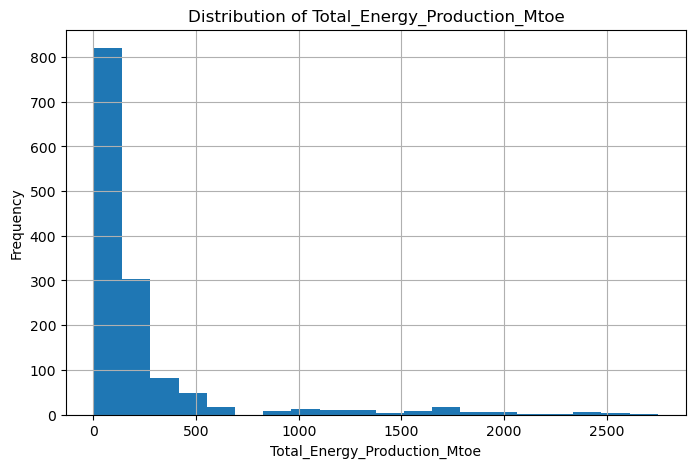

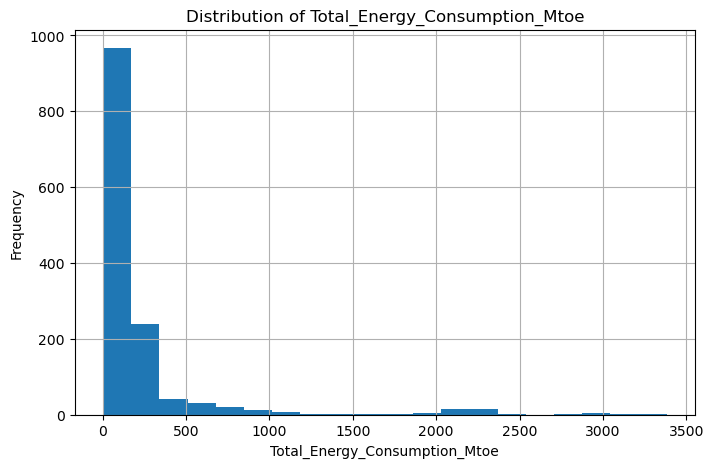

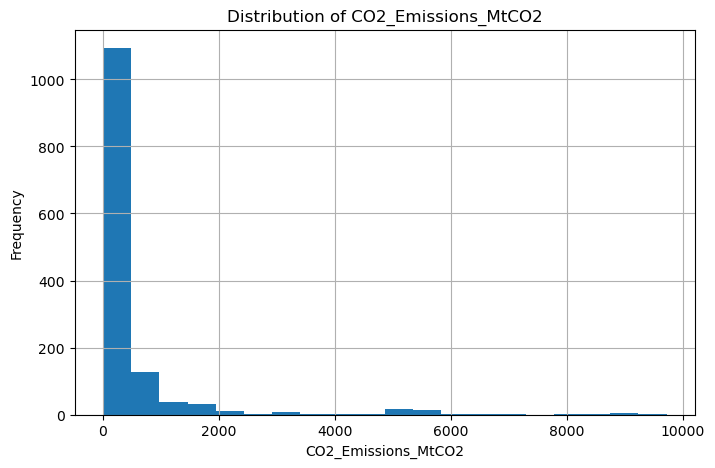

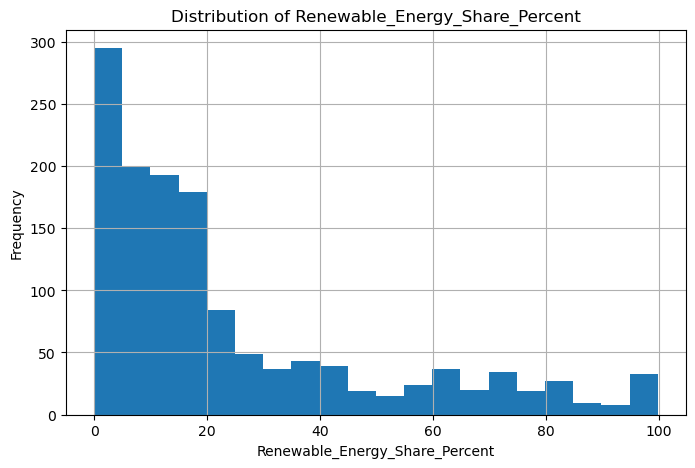

In [13]:

import matplotlib.pyplot as plt

# Columns to visualize
columns_to_visualize = [
    'Total_Energy_Production_Mtoe', 
    'Total_Energy_Consumption_Mtoe', 
    'CO2_Emissions_MtCO2', 
    'Renewable_Energy_Share_Percent'
]

# Plot histograms for the selected columns
for col in columns_to_visualize:
    plt.figure(figsize=(8, 5))
    df1[col].hist(bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


KeyError: "['country', 'CO2 emissions from fuel combustion (MtCO2)'] not in index"

In [24]:
unique_countries = df1['Region'].unique()
unique_countries

array(['Arab States', 'South/Latin America', 'Asia & Pacific', 'Europe',
       'North America', 'Middle east', 'Africa'], dtype=object)